In [1]:
print("The data set I picked is predicting an enrolled students' grades based on a variety of factors outside of school as well as related to school. I picked this because it was interesting to see if things like working, transportation, and family can be used to predict grades. My goal is to use multiple models to find the most accurate model for prediction based on the features given.")

The data set I picked is predicting an enrolled students' grades based on a variety of factors outside of school as well as related to school. I picked this because it was interesting to see if things like working, transportation, and family can be used to predict grades. My goal is to use multiple models to find the most accurate model for prediction based on the features given.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('project2.csv')
#I had to manually name the columns and convert to a US Grade system.
new_column_names = [
    "Student ID",
    "Age",
    "Sex",
    "High School",
    "Scholarship",
    "Additional Work",
    "Regular Activity",
    "Partner",
    "Salary",
    "Transport",
    "Accommodation",
    "Mother Education",
    "Father Education",
    "Siblings",
    "Parental Status",
    "Mother Occupation",
    "Father Occupation",
    "Weekly Study",
    "Reading Frequency (Non-Scientific)",
    "Reading Frequency (Scientific)",
    "Department Seminars Attendance",
    "Impact of Projects",
    "Class Attendance",
    "Midterm Prep Group",
    "Midterm Prep Timelines",
    "Note Taking",
    "Class Listening",
    "Course Interest",
    "Flip Classroom",
    "Cumulative GPA (Last Semester)",
    "Expected GPA",
    "Course ID",
    "Output Grade"
]
df.columns = new_column_names
df = df.drop(columns=["Student ID"])
grade_map = {
    0: "F", 1: "F", 2: "F",
    3: "C", 4: "C",
    5: "B", 6: "B",
    7: "A"
}

df["Output Grade"] = df["Output Grade"].map(grade_map)


df.head()

,Age,Sex,High School,Scholarship,Additional Work,Regular Activity,Partner,Salary,Transport,Accommodation,...,Midterm Prep Group,Midterm Prep Timelines,Note Taking,Class Listening,Course Interest,Flip Classroom,Cumulative GPA (Last Semester),Expected GPA,Course ID,Output Grade
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,F
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,F
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,F
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,F
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,F


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 145 non-null    int64 
 1   Sex                                 145 non-null    int64 
 2   High School                         145 non-null    int64 
 3   Scholarship                         145 non-null    int64 
 4   Additional Work                     145 non-null    int64 
 5   Regular Activity                    145 non-null    int64 
 6   Partner                             145 non-null    int64 
 7   Salary                              145 non-null    int64 
 8   Transport                           145 non-null    int64 
 9   Accommodation                       145 non-null    int64 
 10  Mother Education                    145 non-null    int64 
 11  Father Education                    145 non-null    int64 

In [4]:
df.describe()

,Age,Sex,High School,Scholarship,Additional Work,Regular Activity,Partner,Salary,Transport,Accommodation,...,Class Attendance,Midterm Prep Group,Midterm Prep Timelines,Note Taking,Class Listening,Course Interest,Flip Classroom,Cumulative GPA (Last Semester),Expected GPA,Course ID
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.241379,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.429403,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000


In [5]:
print(f'The features of the data are: {new_column_names}')

The features of the data are: ['Student ID', 'Age', 'Sex', 'High School', 'Scholarship', 'Additional Work', 'Regular Activity', 'Partner', 'Salary', 'Transport', 'Accommodation', 'Mother Education', 'Father Education', 'Siblings', 'Parental Status', 'Mother Occupation', 'Father Occupation', 'Weekly Study', 'Reading Frequency (Non-Scientific)', 'Reading Frequency (Scientific)', 'Department Seminars Attendance', 'Impact of Projects', 'Class Attendance', 'Midterm Prep Group', 'Midterm Prep Timelines', 'Note Taking', 'Class Listening', 'Course Interest', 'Flip Classroom', 'Cumulative GPA (Last Semester)', 'Expected GPA', 'Course ID', 'Output Grade']


In [6]:
print("Every single variable is categorical because any continous variables were binned. Categorical variables use their data to help categorize them. Continuous data is usually in a range of any numbers, but they were all reduced into categories already.")

Every single variable is categorical because any continous variables were binned. Categorical variables use their data to help categorize them. Continuous data is usually in a range of any numbers, but they were all reduced into categories already.


In [7]:
print("df.info() shows us that there are 0 missing values.")

df.info() shows us that there are 0 missing values.


In [8]:
print(f'The unique values of each feature are:\n{df.nunique()}')

The unique values of each feature are:
Age                                   3
Sex                                   2
High School                           3
Scholarship                           5
Additional Work                       2
Regular Activity                      2
Partner                               2
Salary                                5
Transport                             4
Accommodation                         4
Mother Education                      6
Father Education                      6
Siblings                              5
Parental Status                       3
Mother Occupation                     5
Father Occupation                     5
Weekly Study                          5
Reading Frequency (Non-Scientific)    3
Reading Frequency (Scientific)        3
Department Seminars Attendance        2
Impact of Projects                    3
Class Attendance                      2
Midterm Prep Group                    3
Midterm Prep Timelines                3
N

In [9]:
df.sum().isnull()

Age                                   False
Sex                                   False
High School                           False
Scholarship                           False
Additional Work                       False
Regular Activity                      False
Partner                               False
Salary                                False
Transport                             False
Accommodation                         False
Mother Education                      False
Father Education                      False
Siblings                              False
Parental Status                       False
Mother Occupation                     False
Father Occupation                     False
Weekly Study                          False
Reading Frequency (Non-Scientific)    False
Reading Frequency (Scientific)        False
Department Seminars Attendance        False
Impact of Projects                    False
Class Attendance                      False
Midterm Prep Group              

In [10]:
print("There are 0 null values.")

There are 0 null values.


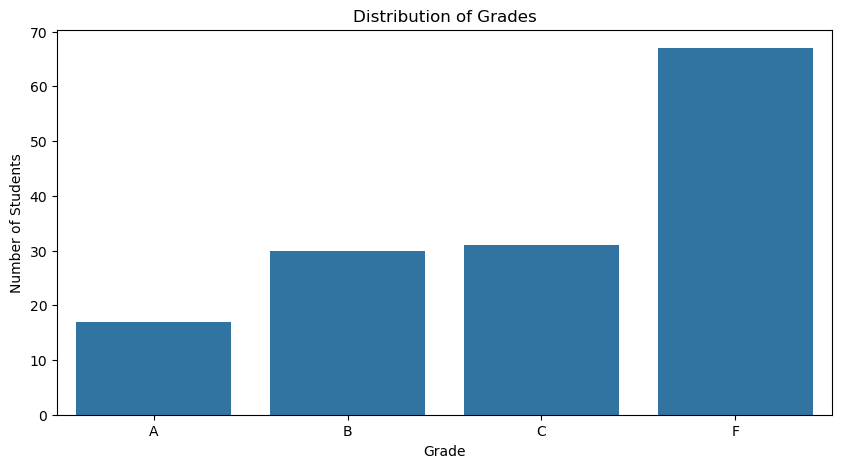

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

grade_order = ["A", "B", "C", "F"]

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Output Grade", order=grade_order)
plt.title("Distribution of Grades")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.show()

In [12]:
print("This plot shows me that students with an A have the lowest amount. The number of failing students is almost more than the passing students.")

This plot shows me that students with an A have the lowest amount. The number of failing students is almost more than the passing students.


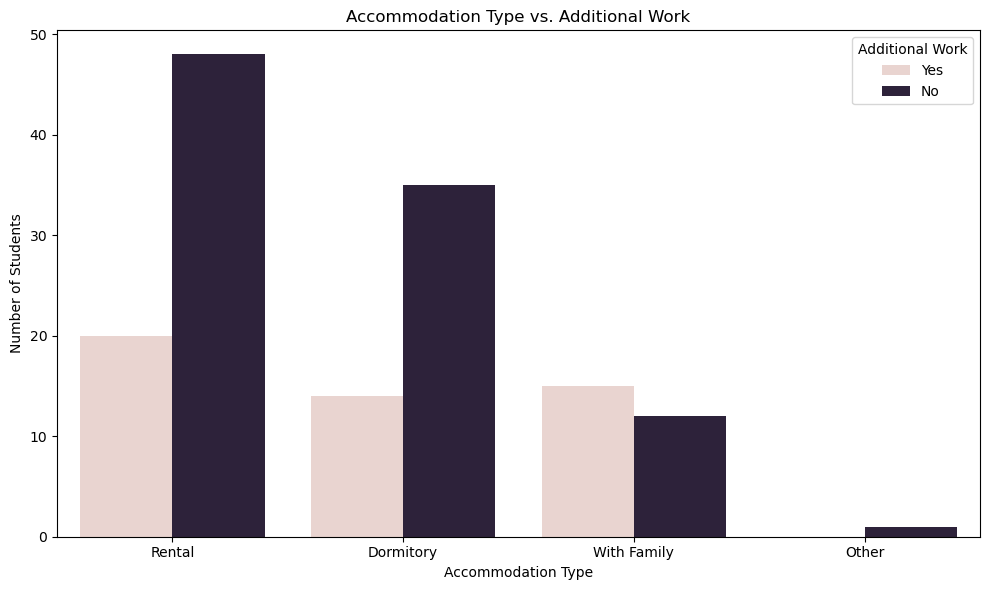

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Accommodation", hue="Additional Work")

tick_positions = [0, 1, 2, 3] 
tick_labels = ["Rental", "Dormitory", "With Family", "Other"]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Yes", "No"], title="Additional Work")

plt.title("Accommodation Type vs. Additional Work")
plt.xlabel("Accommodation Type")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

In [14]:
print("From this graph, most students who are renting or in a dorm are not working. Those who live with their family usually are working.")

From this graph, most students who are renting or in a dorm are not working. Those who live with their family usually are working.


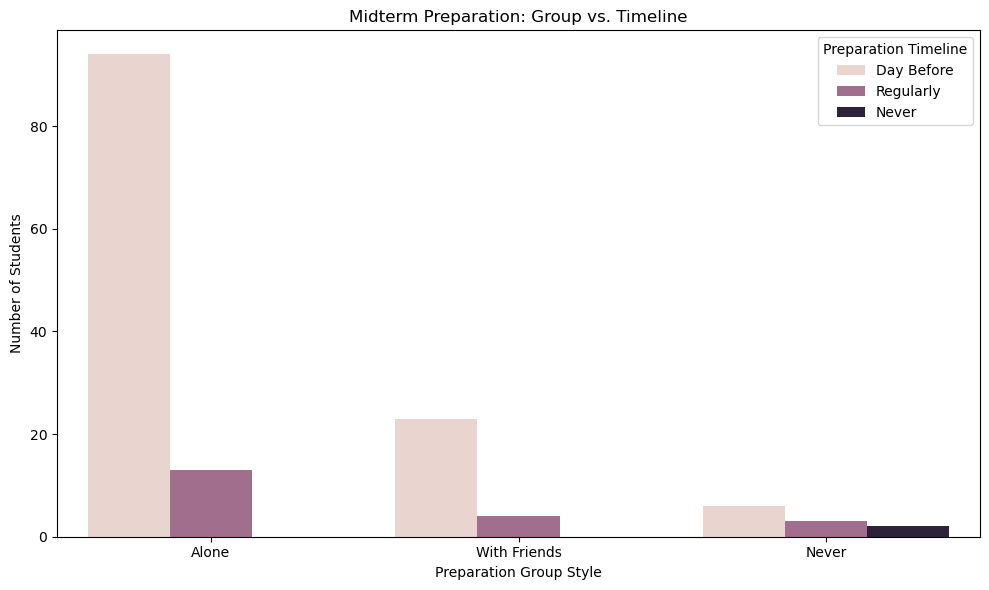

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="Midterm Prep Group",
    hue="Midterm Prep Timelines",
    order=[1, 2, 3], 
    hue_order=[1, 2, 3]  
)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["Alone", "With Friends", "Never"])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Day Before", "Regularly", "Never"], title="Preparation Timeline")

plt.title("Midterm Preparation: Group vs. Timeline")
plt.xlabel("Preparation Group Style")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

In [16]:
print("This shows that a lot of students are studying the day before, which is probably why there's not a lot of A's.")

This shows that a lot of students are studying the day before, which is probably why there's not a lot of A's.


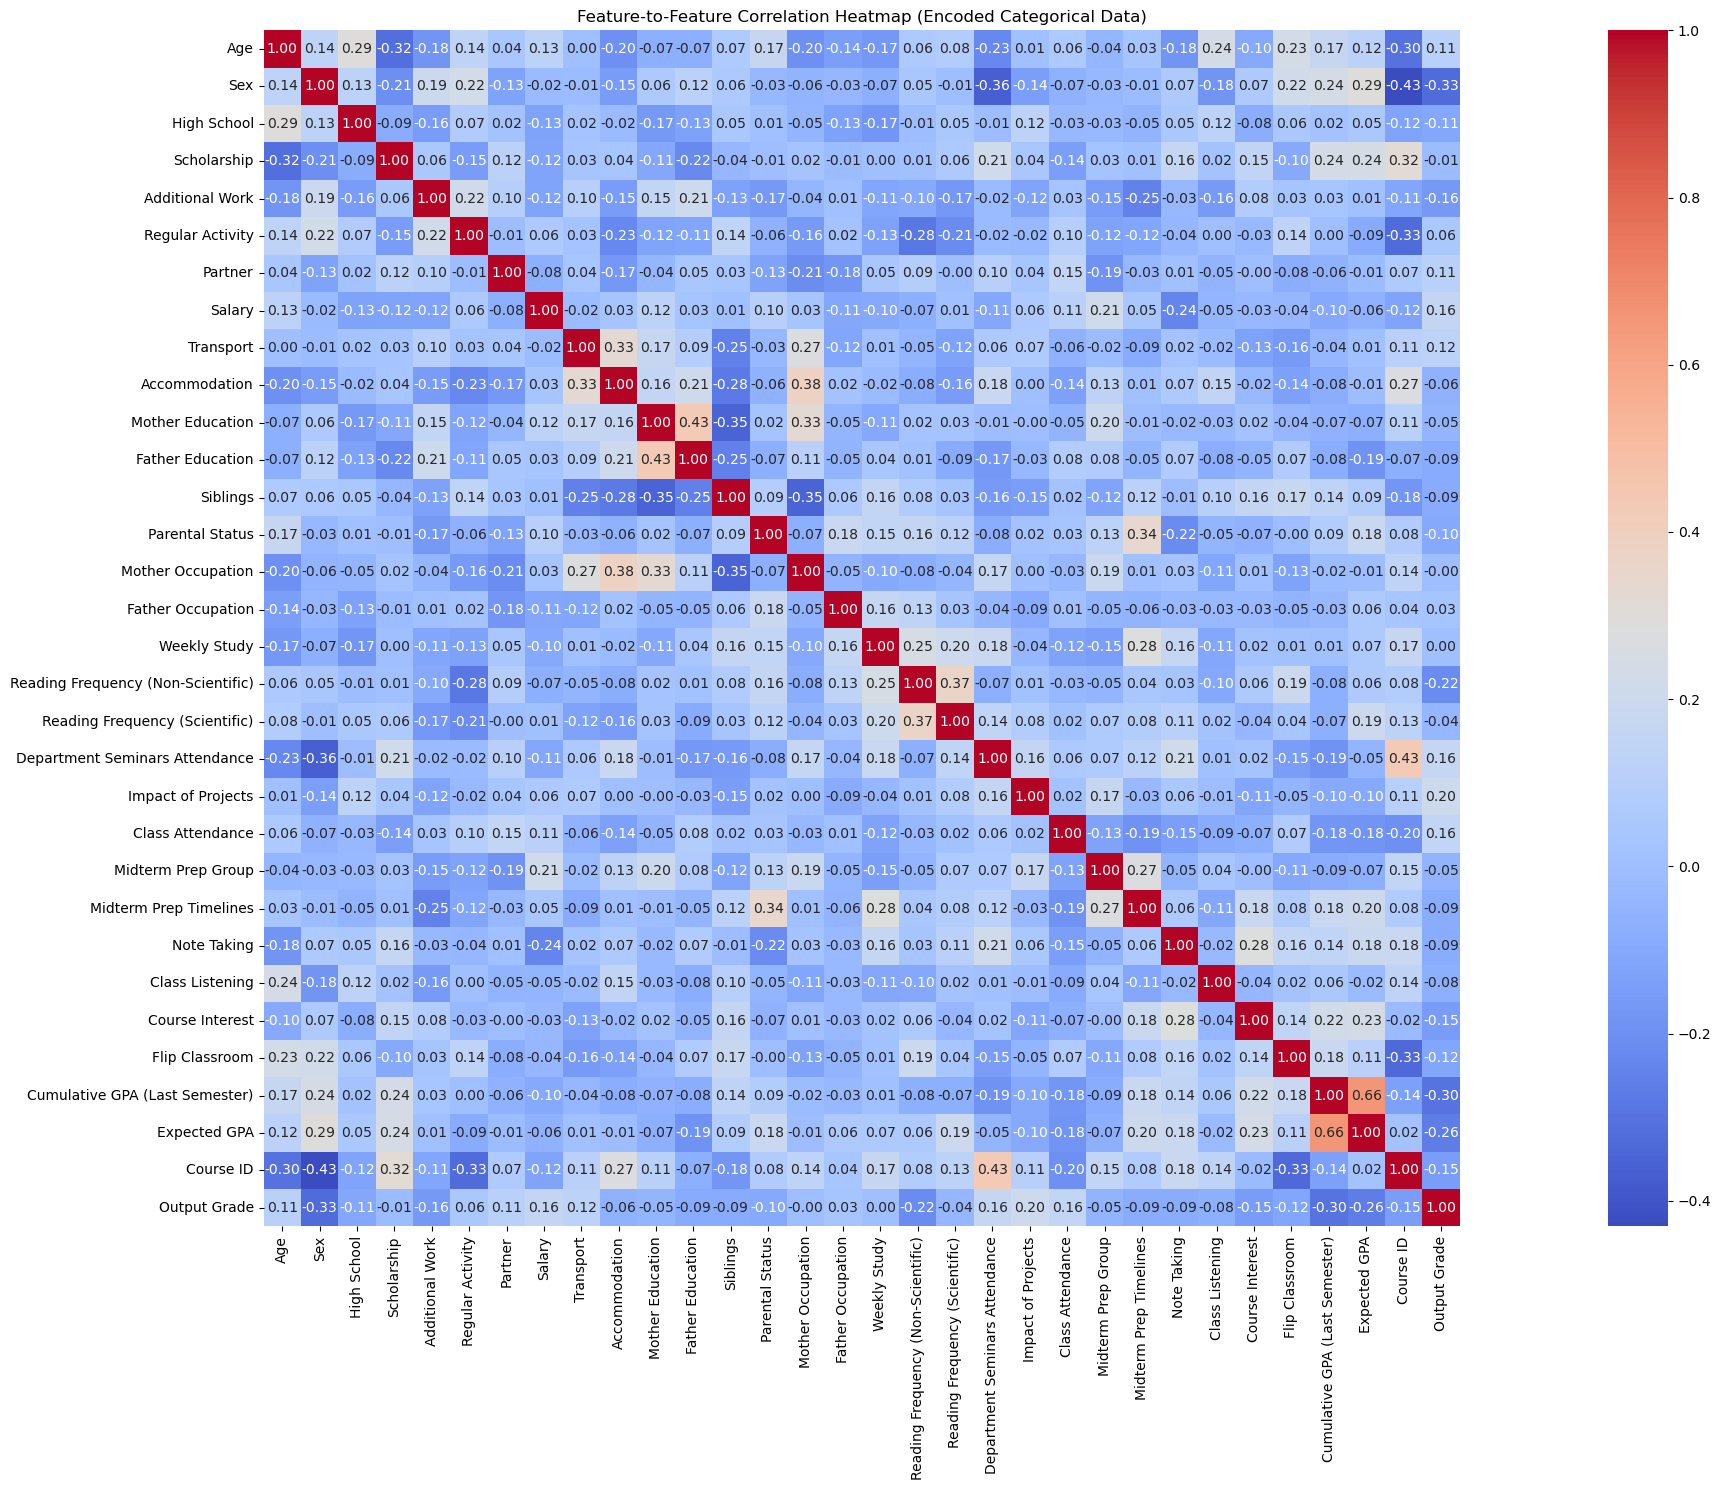

In [17]:
df_encoded = df.copy()
for col in df_encoded.columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

corr_matrix = df_encoded.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

plt.title("Feature-to-Feature Correlation Heatmap (Encoded Categorical Data)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
print("It seems that the education of both parents is moderately correlated. There also might be some correlation between a mother's occupation and the student's accomadation.")

It seems that the education of both parents is moderately correlated. There also might be some correlation between a mother's occupation and the student's accomadation.


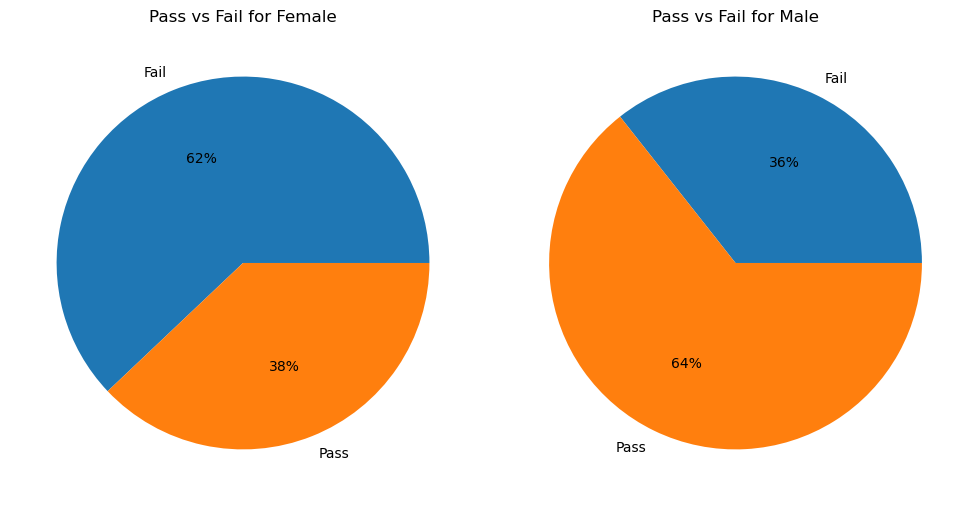

In [19]:
sex_map = {1: "Female", 2: "Male"}
df["Sex Label"] = df["Sex"].map(sex_map)
df["Pass/Fail"] = df["Output Grade"].apply(lambda x: "Pass" if x in ["C", "B", "A"] else "Fail")
sex_pass_counts = df.groupby(["Sex Label", "Pass/Fail"]).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, sex in zip(axes, sex_pass_counts.index):
    sex_pass_counts.loc[sex].plot.pie(
        ax=ax,
        autopct="%1.0f%%",
        ylabel="",
        title=f"Pass vs Fail for {sex}"
    )

plt.tight_layout()
plt.show()

In [20]:
print("More than half of females fail, while more than half of males pass overall.")

More than half of females fail, while more than half of males pass overall.


In [21]:
print("Based on all the graphs, it seems that there are a lot of students who study at the last minute, and almost a 50/50 for failing vs passing.")

Based on all the graphs, it seems that there are a lot of students who study at the last minute, and almost a 50/50 for failing vs passing.


In [22]:
print("We don't need to scale because everything is already binned and categorized.")

We don't need to scale because everything is already binned and categorized.


In [23]:
print("I dropped the student ID because it's not relevant. It's just a list starting from 1 and counting up. I also went back to regroup output grade to pass and fail in order to increase my accuracy. I used LDA because I have so many features.")

I dropped the student ID because it's not relevant. It's just a list starting from 1 and counting up. I also went back to regroup output grade to pass and fail in order to increase my accuracy. I used LDA because I have so many features.


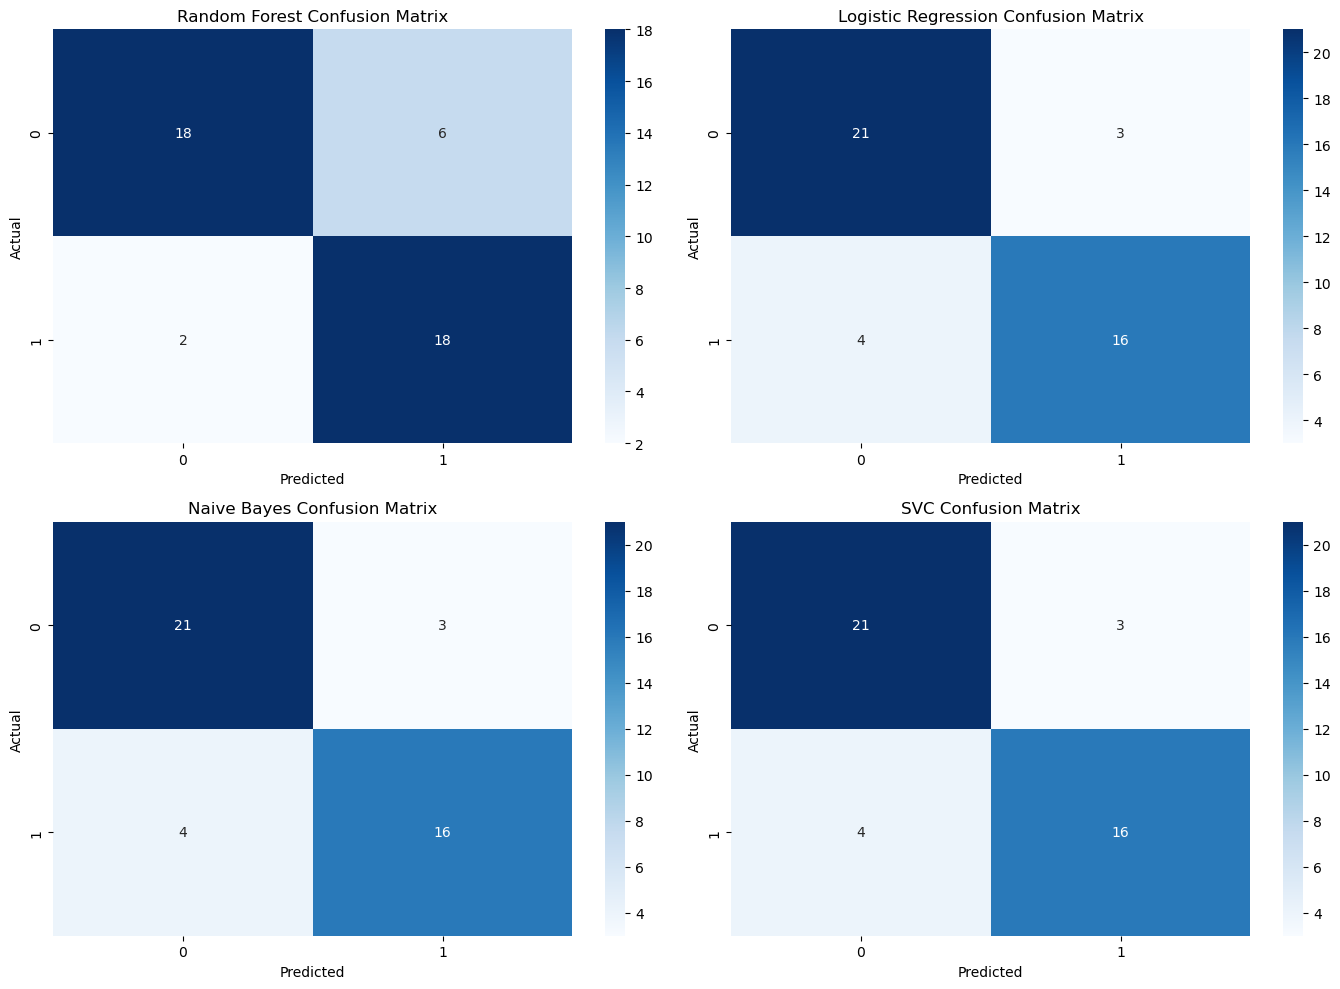


Model Performance Summary:

                       Model  Accuracy  F1 (Fail)  F1 (Pass)  \
0   Random Forest Classifier     0.818      0.818      0.818   
1        Logistic Regression     0.841      0.857      0.821   
2       Gaussian Naive Bayes     0.841      0.857      0.821   
3  Support Vector Classifier     0.841      0.857      0.821   

   Precision (Fail)  Precision (Pass)  Recall (Fail)  Recall (Pass)  
0              0.90             0.750          0.750            0.9  
1              0.84             0.842          0.875            0.8  
2              0.84             0.842          0.875            0.8  
3              0.84             0.842          0.875            0.8  


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df['Output Grade'] = df['Output Grade'].astype(str).str.strip().str.upper()

grade_map = {
    'F': 0,  
    'C': 1,  
    'B': 1,
    'A': 1
}
df['Grade Binary'] = df['Output Grade'].map(grade_map)

X = df.drop(columns=['Output Grade'])
X = pd.get_dummies(X, drop_first=True)  
y = df['Grade Binary'].astype(int)

lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC(probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "accuracy": accuracy_score(y_test, preds),
        "report": classification_report(y_test, preds, output_dict=True),
        "conf_matrix": confusion_matrix(y_test, preds)
    }
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, name in enumerate(models):
    sns.heatmap(results[name]["conf_matrix"], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

performance_data = []
for name in models:
    report = results[name]["report"]
    accuracy = results[name]["accuracy"]
    performance_data.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'F1 (Fail)': round(report['0']['f1-score'], 3),
        'F1 (Pass)': round(report['1']['f1-score'], 3),
        'Precision (Fail)': round(report['0']['precision'], 3),
        'Precision (Pass)': round(report['1']['precision'], 3),
        'Recall (Fail)': round(report['0']['recall'], 3),
        'Recall (Pass)': round(report['1']['recall'], 3)
    })


performance_data = []
model_labels = {
    "Random Forest": "Random Forest Classifier",
    "Logistic Regression": "Logistic Regression",
    "Naive Bayes": "Gaussian Naive Bayes",
    "SVC": "Support Vector Classifier"
}

for name in models:
    report = results[name]["report"]
    accuracy = results[name]["accuracy"]
    performance_data.append({
        'Model': model_labels[name],  
        'Accuracy': round(accuracy, 3),
        'F1 (Fail)': round(report['0']['f1-score'], 3),
        'F1 (Pass)': round(report['1']['f1-score'], 3),
        'Precision (Fail)': round(report['0']['precision'], 3),
        'Precision (Pass)': round(report['1']['precision'], 3),
        'Recall (Fail)': round(report['0']['recall'], 3),
        'Recall (Pass)': round(report['1']['recall'], 3)
    })
performance_df = pd.DataFrame(performance_data)
print("\nModel Performance Summary:\n")
print(performance_df)

In [25]:
print("I used two parametric models and two non-parametric models just to see what would have the best accuracy. The random forest and SVC were my non parametrics. Random Forest can be used for most types of data and reduces any variance while keeping track of feature importance. Naive Bayes is good for high dimensional data and is pretty fast. SVM/SVC also works well in high dimension and is resistant to overfitting. Logistric regression is a simple model to classify the data.")

I used two parametric models and two non-parametric models just to see what would have the best accuracy. The random forest and SVC were my non parametrics. Random Forest can be used for most types of data and reduces any variance while keeping track of feature importance. Naive Bayes is good for high dimensional data and is pretty fast. SVM/SVC also works well in high dimension and is resistant to overfitting. Logistric regression is a simple model to classify the data.


In [26]:
print("Surprisingly, all models except for random forest were tied for top perormance. Logisitic Regression, Naive Bayes, and SVC all had an accuracy score of .841. Random Forest had a score of .818.")

Surprisingly, all models except for random forest were tied for top perormance. Logisitic Regression, Naive Bayes, and SVC all had an accuracy score of .841. Random Forest had a score of .818.


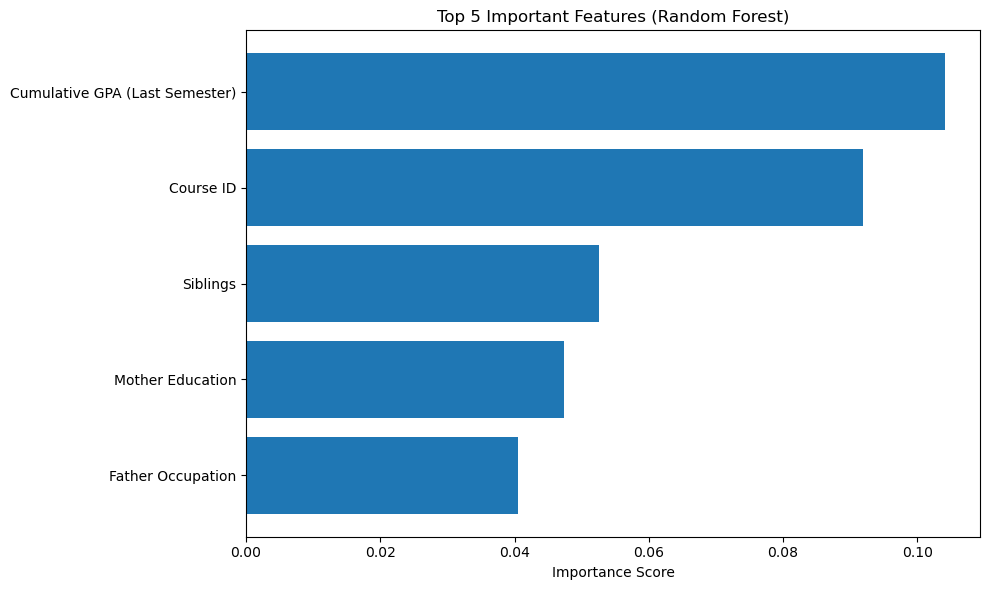

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Output Grade Encoded'] = le.fit_transform(df['Output Grade'].astype(str).str.strip().str.upper())

X_rf = df.drop(columns=[
    'Output Grade',
    'Output Grade Encoded',
    'Grade Binary',
    'Pass/Fail'
])
X_rf = pd.get_dummies(X_rf, drop_first=True)
y_rf = df['Output Grade Encoded']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_rf, y_rf)

importances = rf_model.feature_importances_
feature_names = X_rf.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_features = importance_df.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 5 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [33]:
print("Cumulative GPA from last semester, Course ID, and Siblings were the most important features.")

Cumulative GPA from last semester, Course ID, and Siblings were the most important features.


In [ ]:
print("Using scaling or regularization techniques will help us to better predict a student's performance based on important factors such as Cumulative GPA, Course ID, and Siblings. All of the models performed above 80%. We could possibly increase the accuracy by finding more data or samples.") 